Ucitavanje podataka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
df = pd.read_csv('HCV-Egy-Data.csv')

In [181]:
df.columns=['Age','Gender','BMI','Fever','Nausea','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','Plat.','AST','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALTA24',
              'RNA 1','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Histological Grading','Histological Staging']

dfcp = df.copy()

In [182]:
numerical_columns = ['Age','BMI','WBC','RBC','HGB','Plat.','AST','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALTA24',
              'RNA 1','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Histological Grading']

#numerical_columns = [element for element in numerical_columns if element not in exclude_columns]

#bool_columns =[]# ['Gender','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain','Fever','Nausea']
#dfcp.drop([], axis=1, inplace=True)
#dfcp = pd.get_dummies(dfcp, columns=bool_columns,prefix=bool_columns)
#dfcp.info()

Preprocesiranje

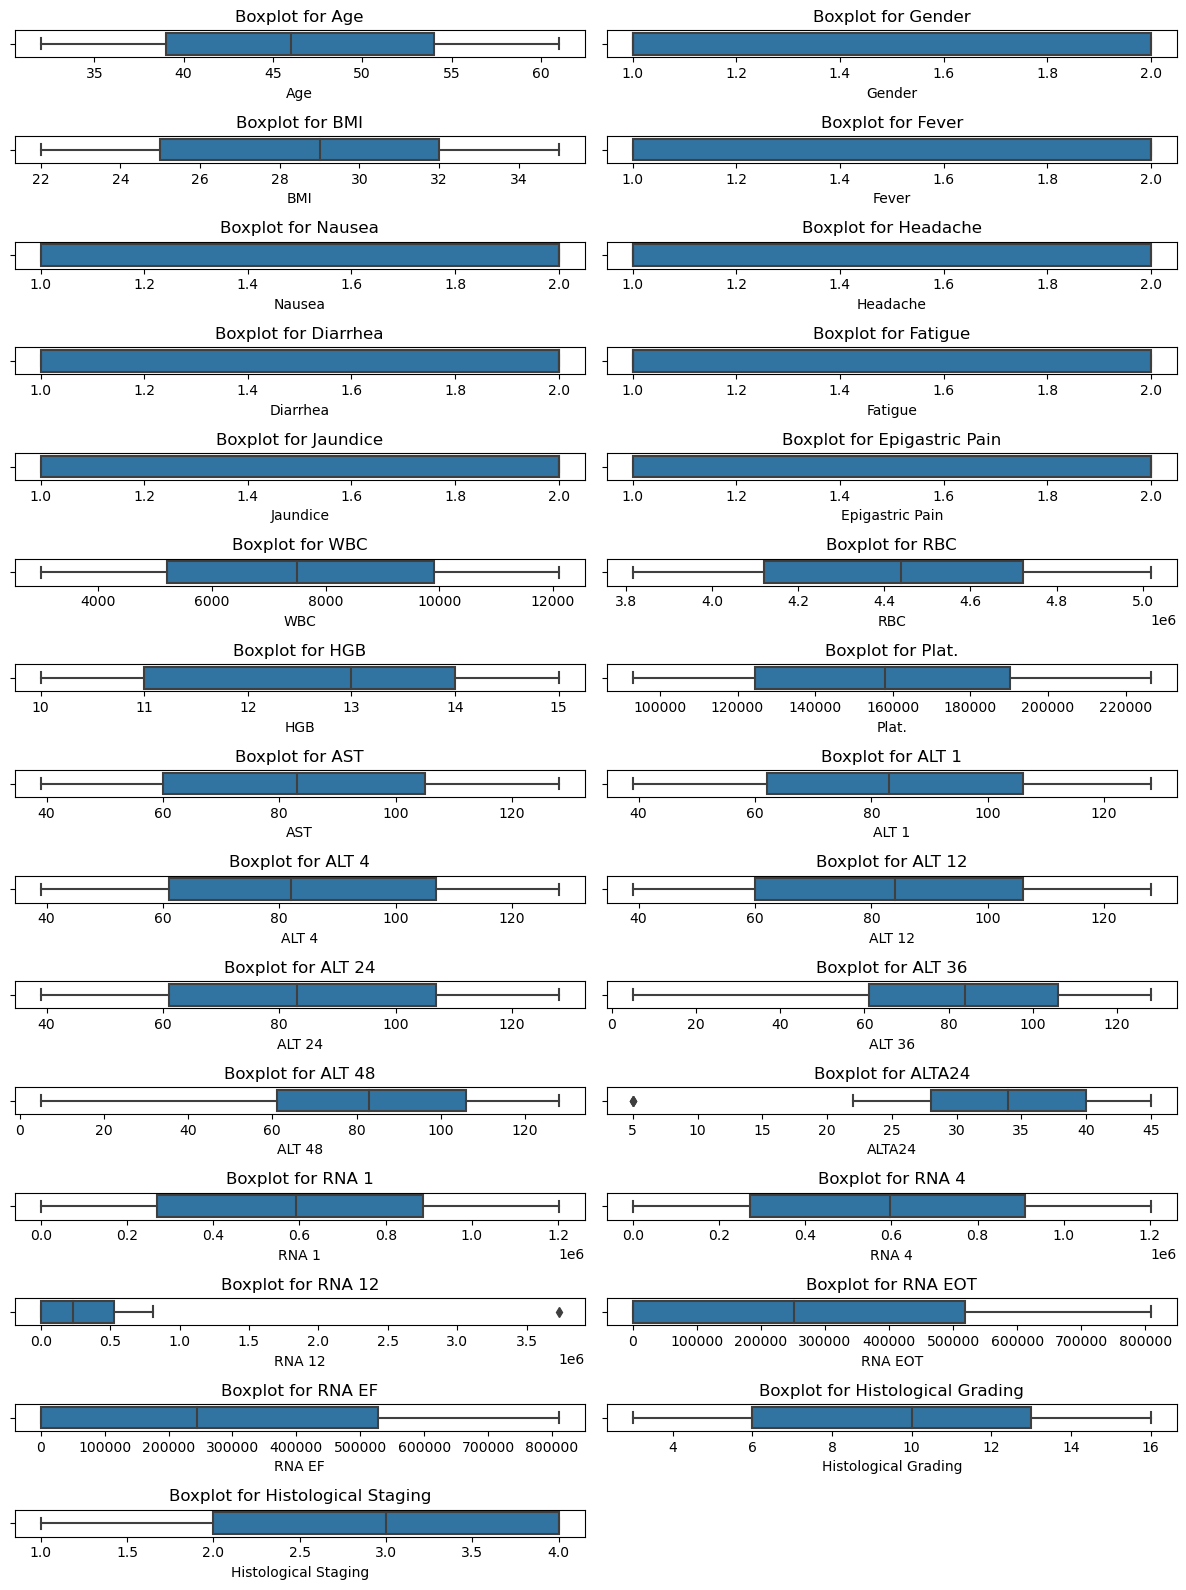

In [183]:
# Get the number of features
num_features = len(dfcp.columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(num_features / 2))
num_cols = 2

# Set the size of the plot
plt.figure(figsize=(12, 16))

# Iterate through each column in the DataFrame and create a box plot
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust the subplot layout based on the number of features
    sns.boxplot(x=dfcp[column])
    plt.title(f'Boxplot for {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

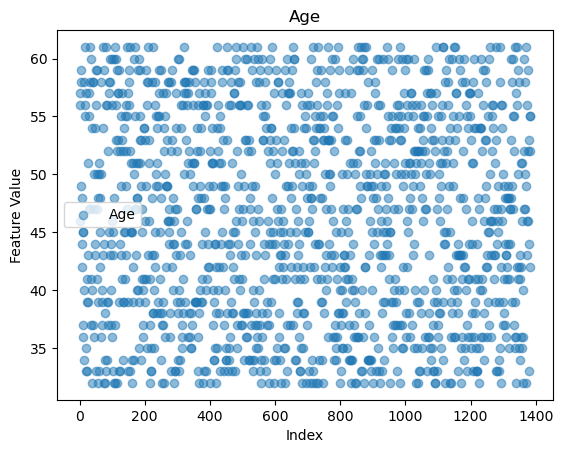

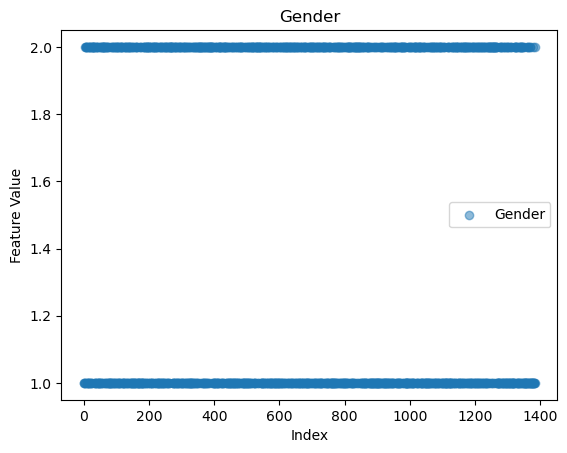

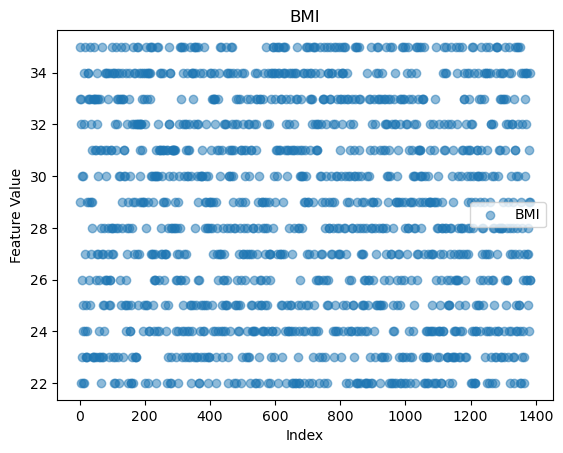

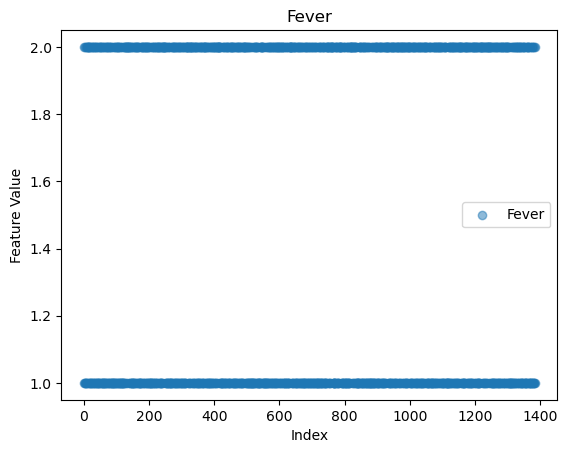

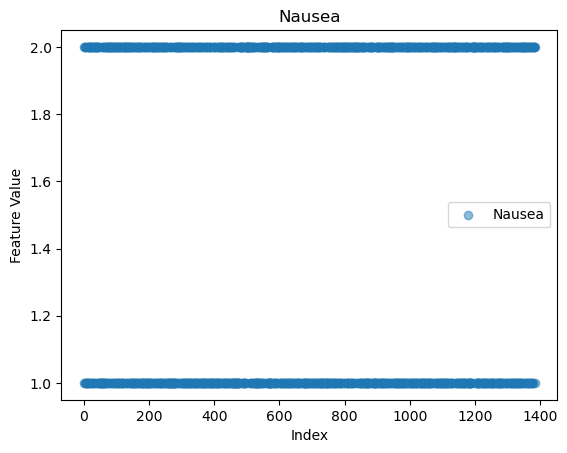

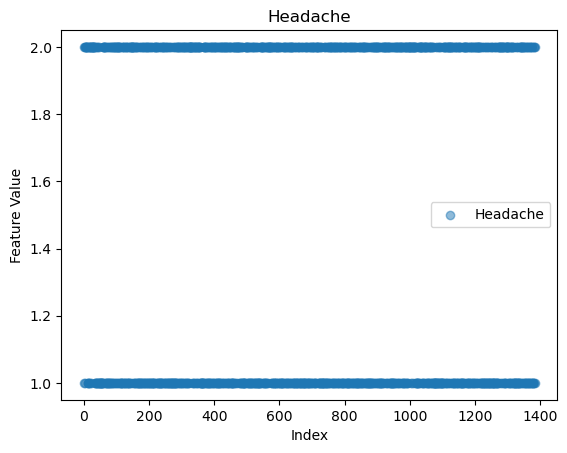

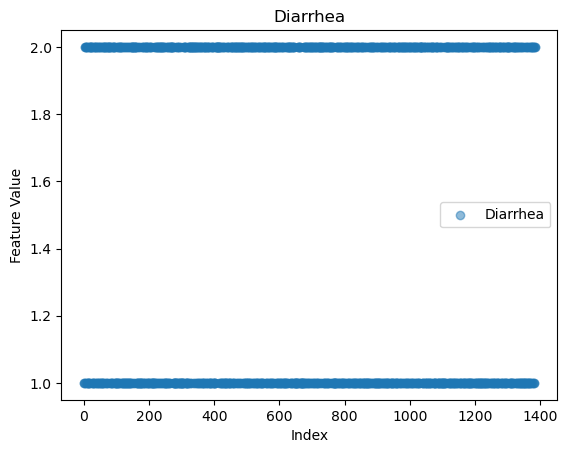

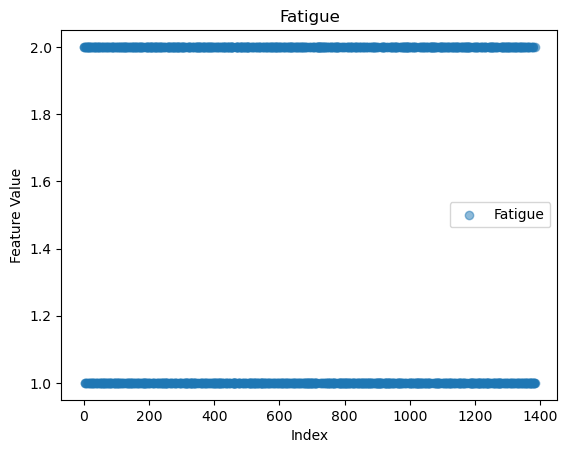

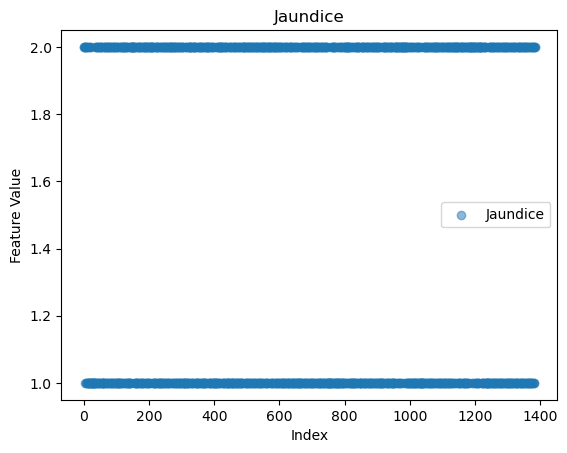

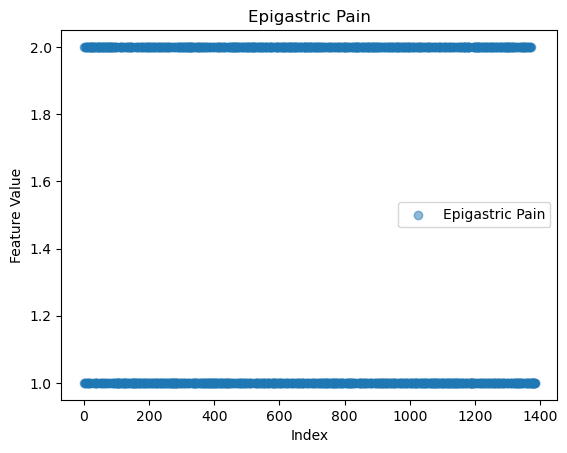

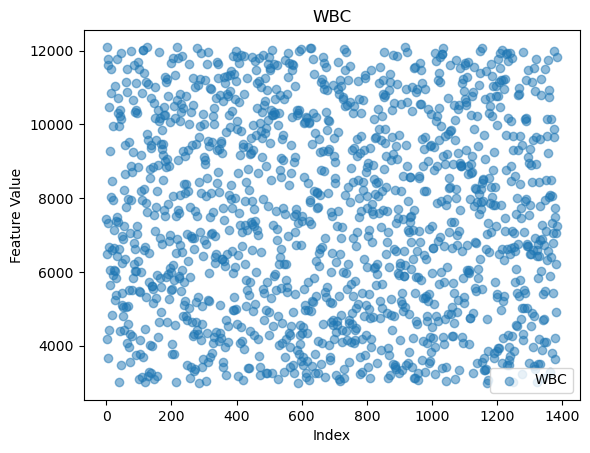

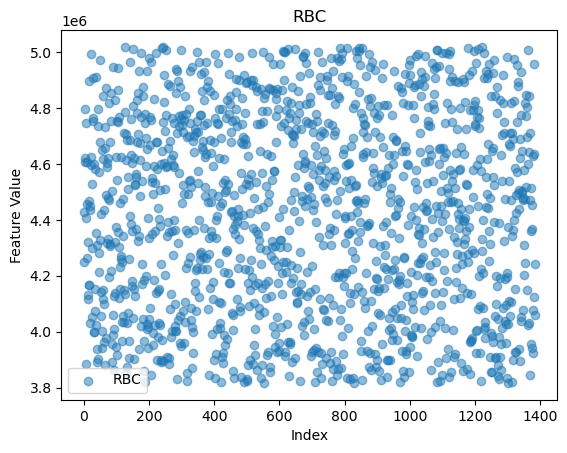

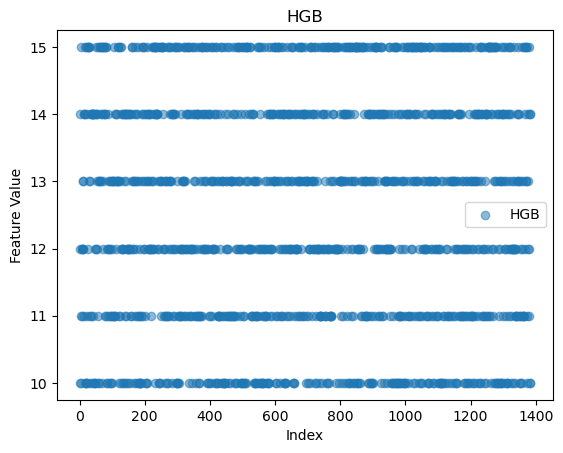

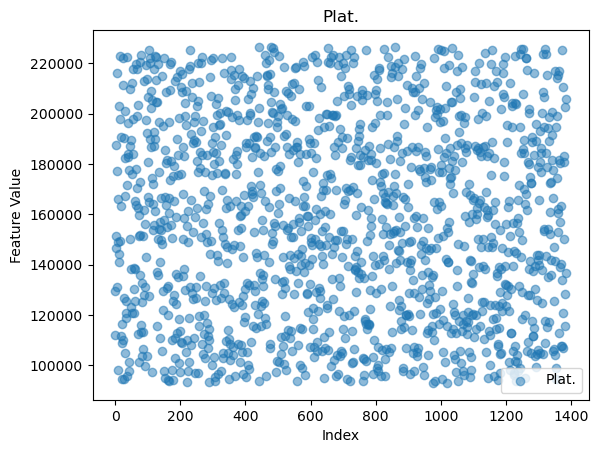

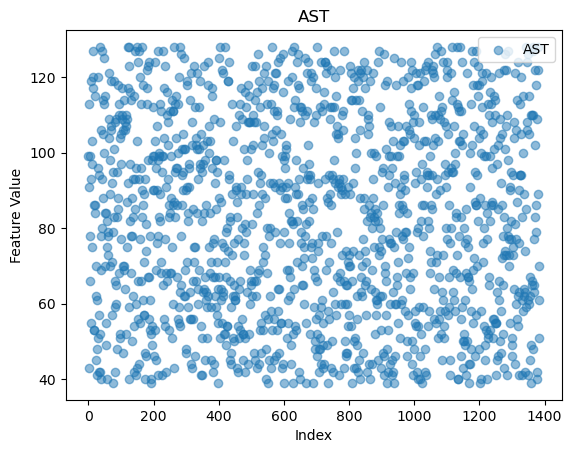

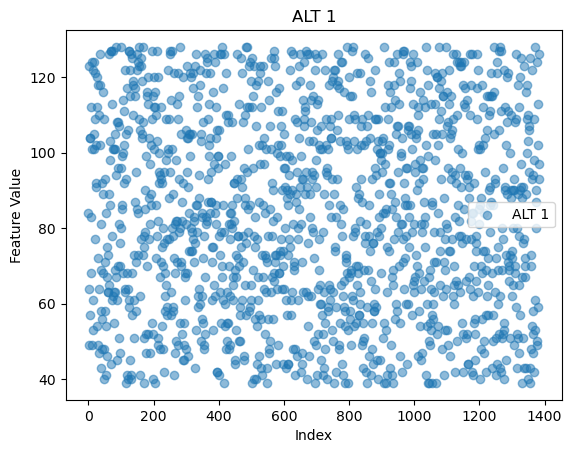

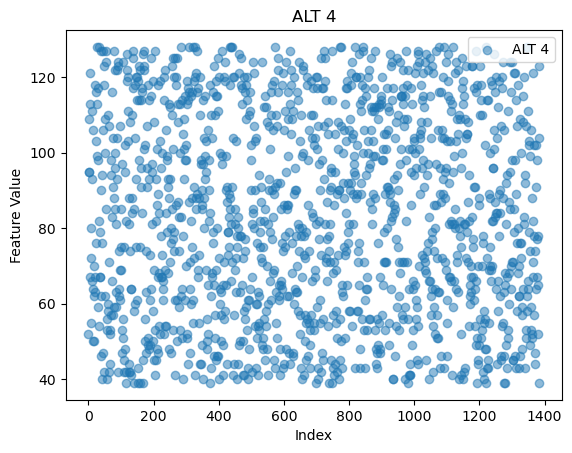

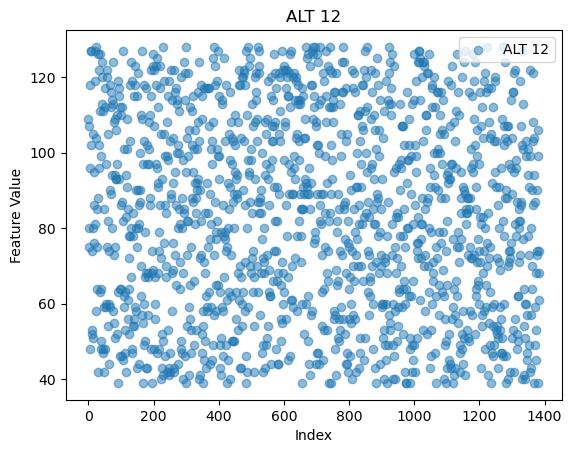

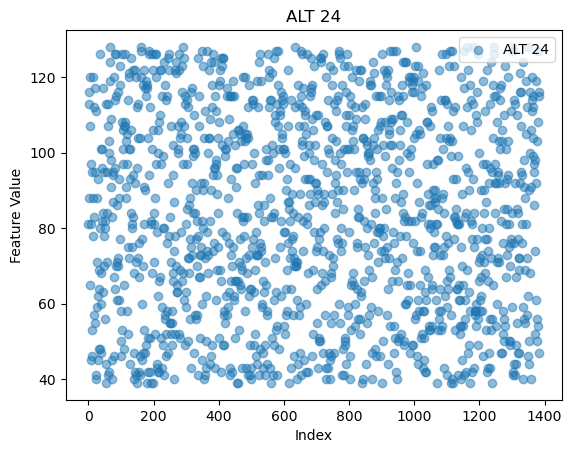

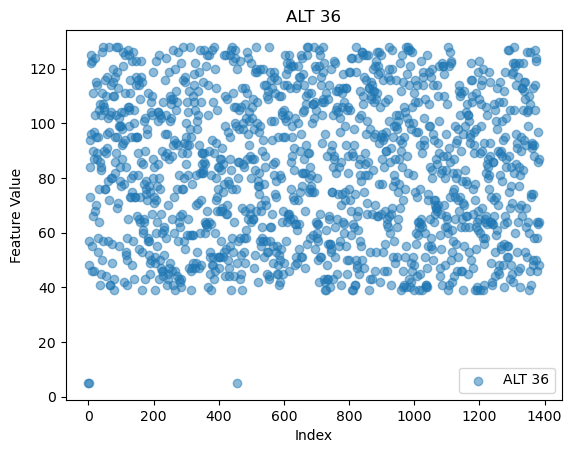

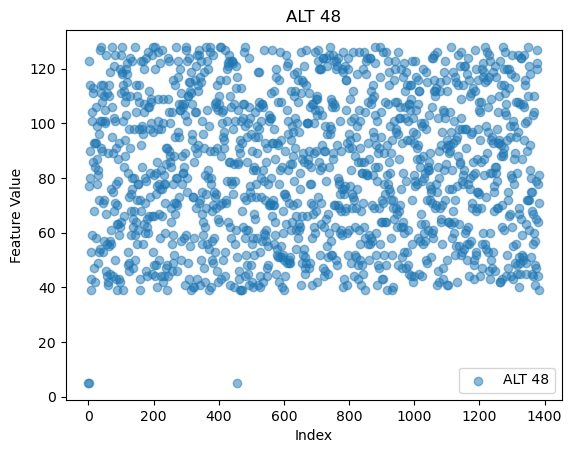

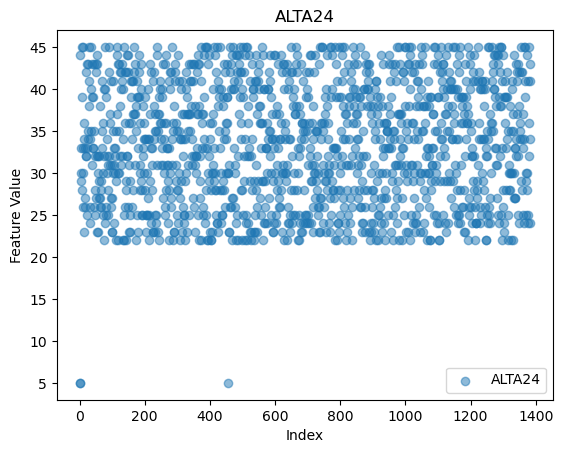

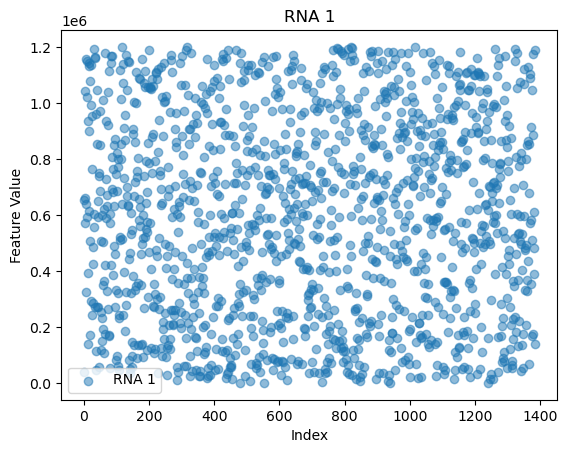

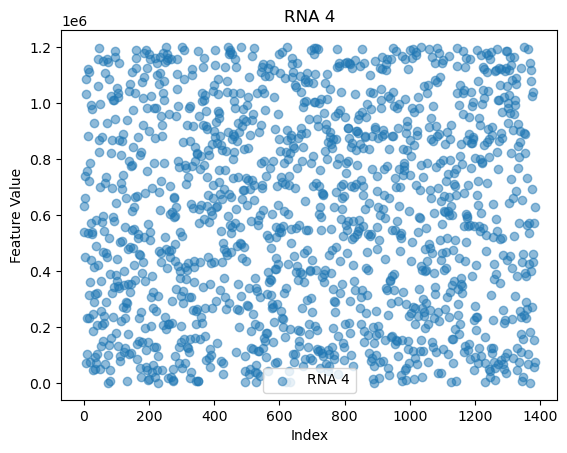

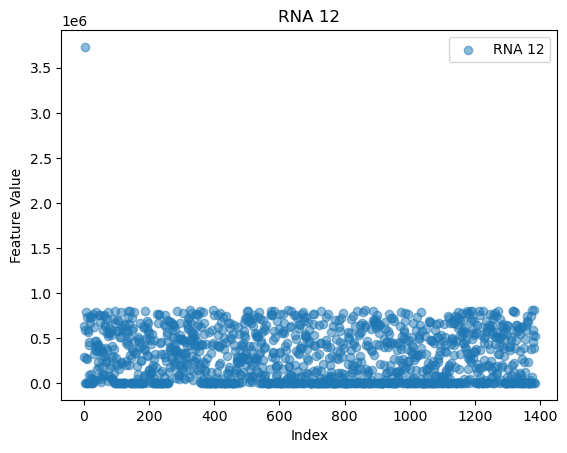

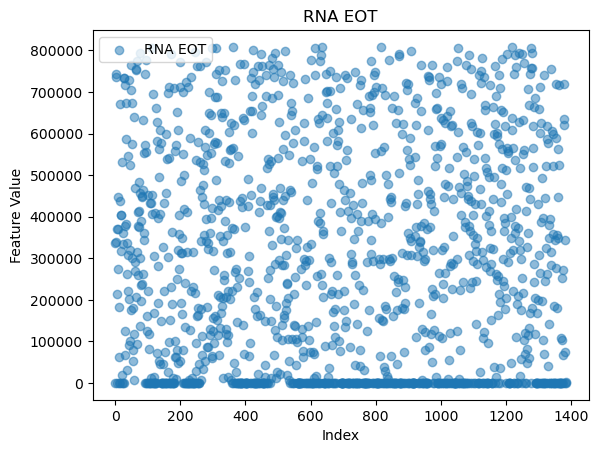

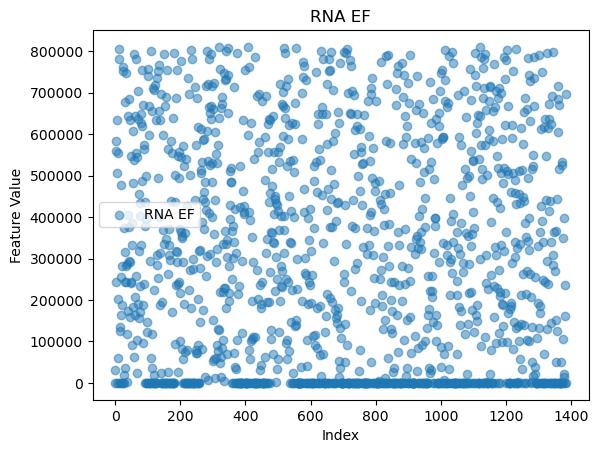

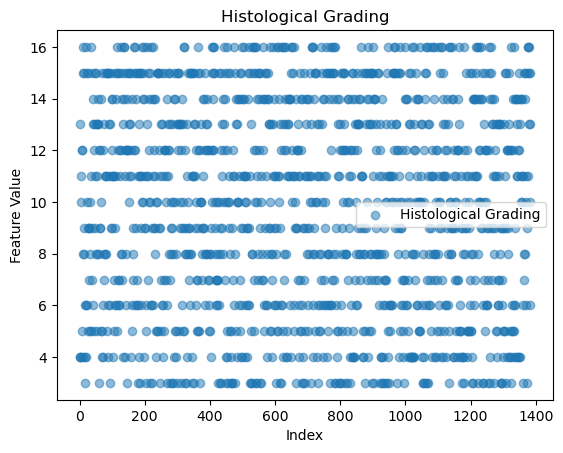

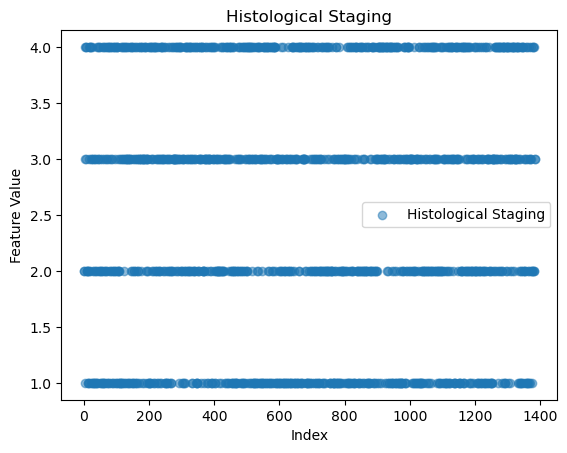

In [11]:
for column in dfcp.columns:
    plt.scatter(range(len(dfcp)), dfcp[column], label=column, alpha=0.5)
    plt.title(column)
    plt.xlabel("Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()

In [12]:
#remove outliers
condition = ((dfcp['ALT 36'] < 20))
dfcp = dfcp[~condition]

condition = ((dfcp['RNA 12'] > 1000000))
dfcp = dfcp[~condition]

condition = ((dfcp['ALTA24'] < 20))
dfcp = dfcp[~condition]

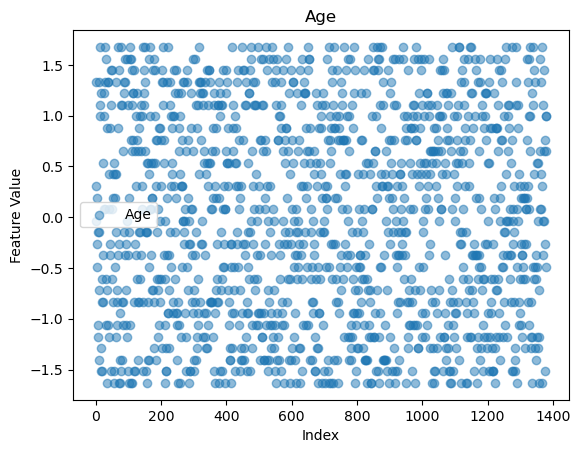

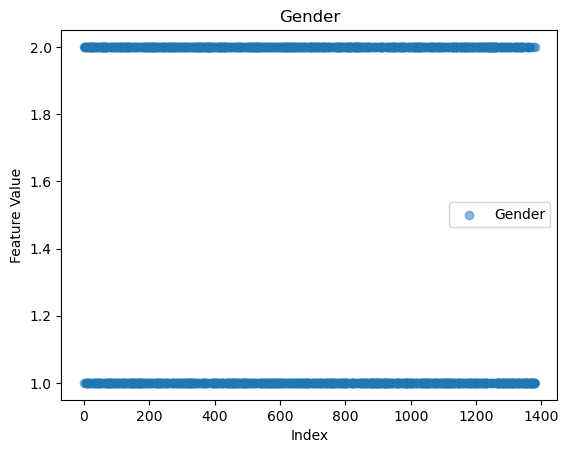

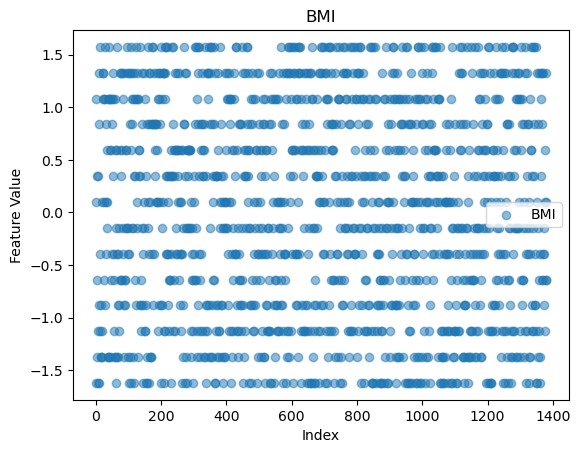

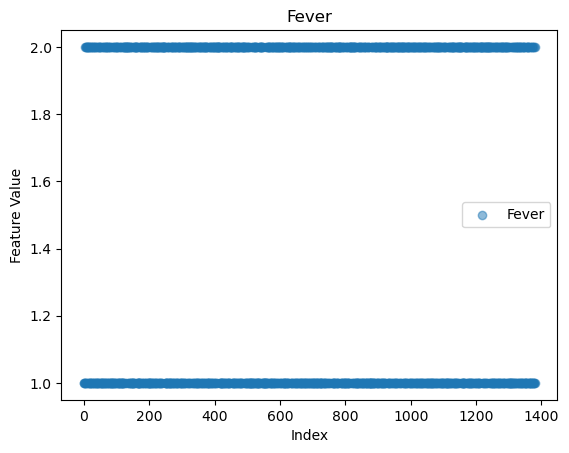

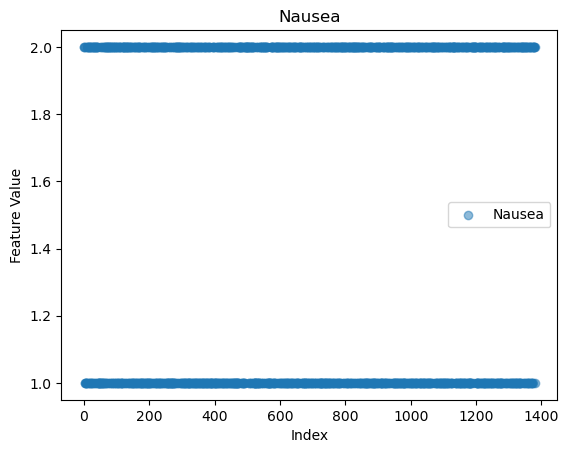

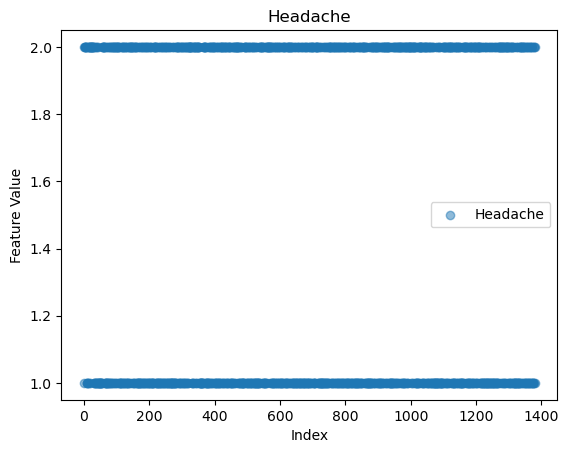

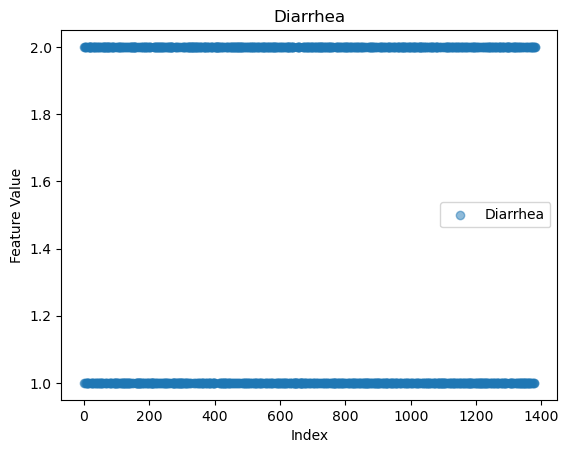

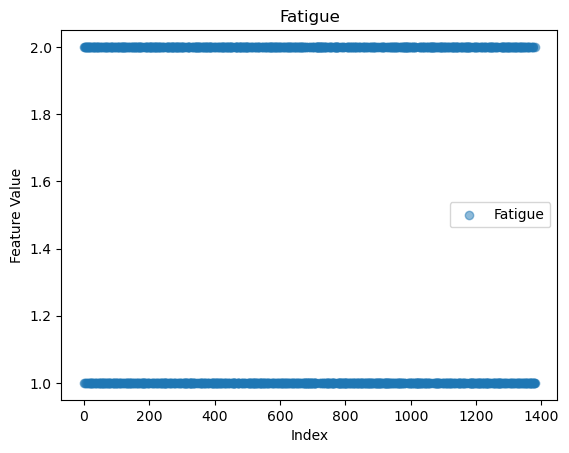

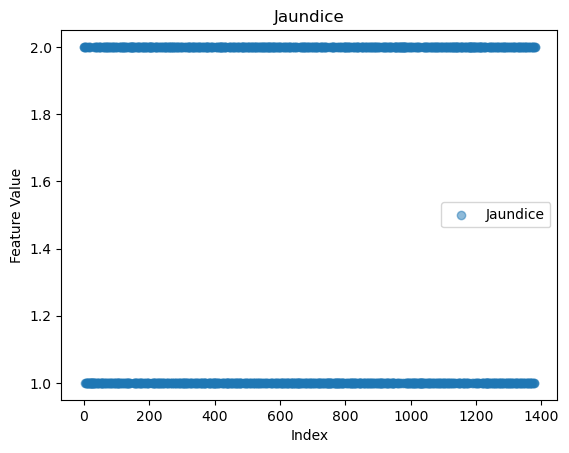

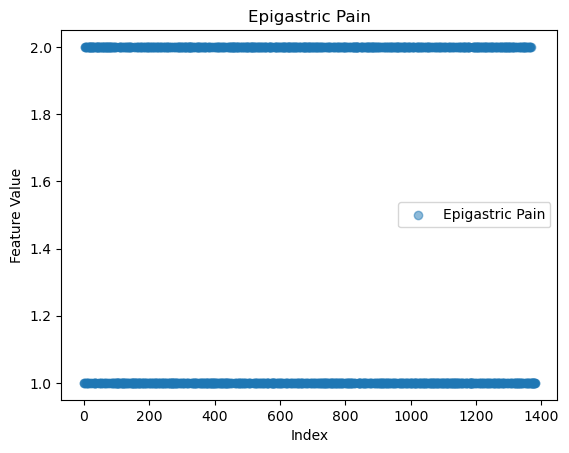

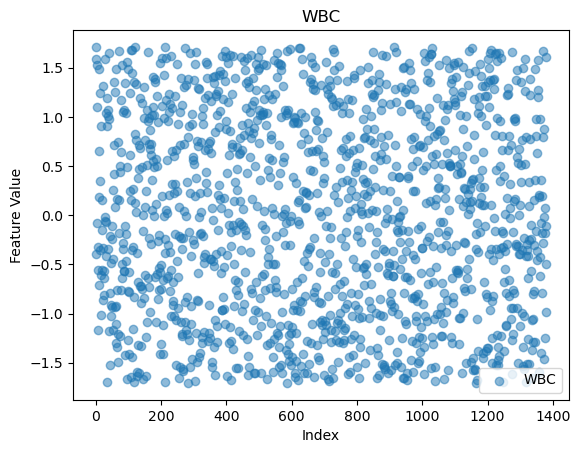

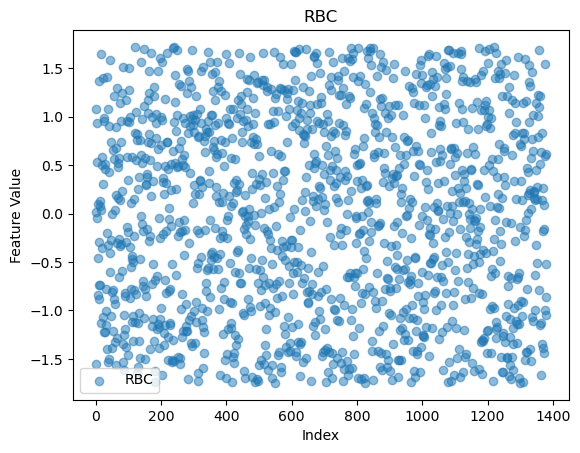

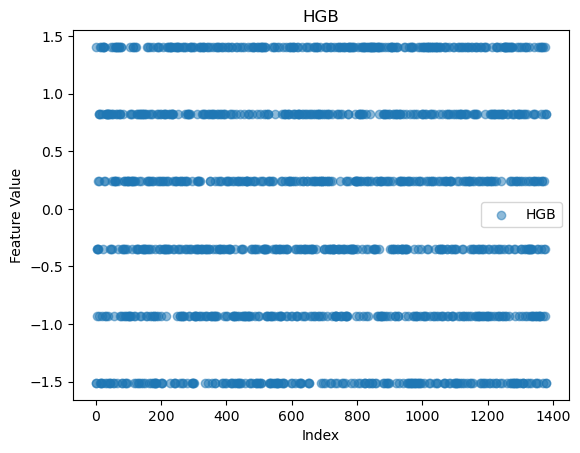

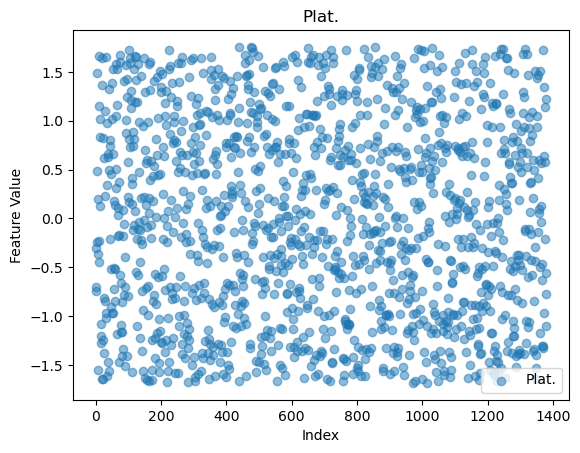

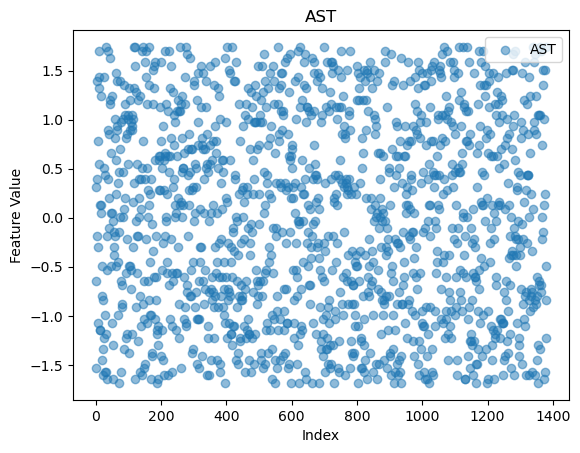

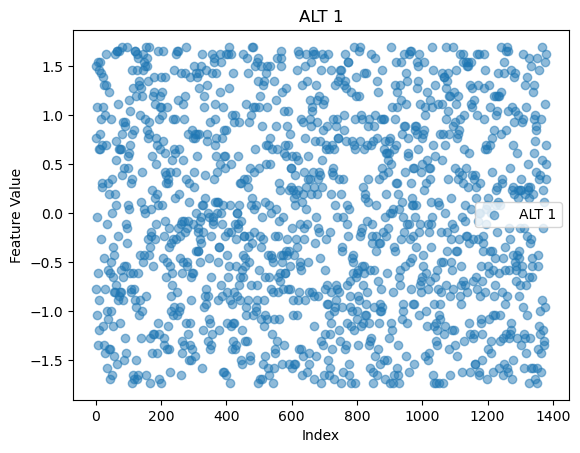

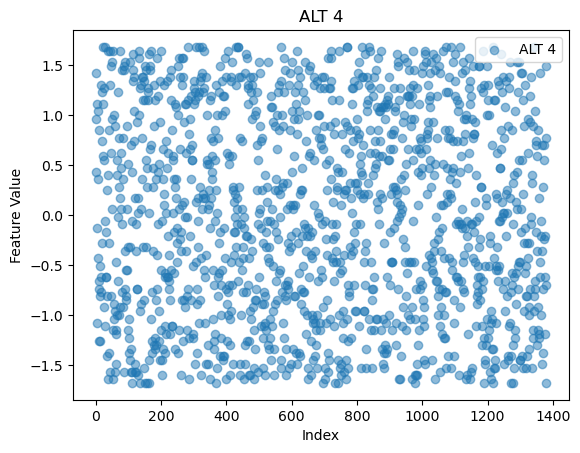

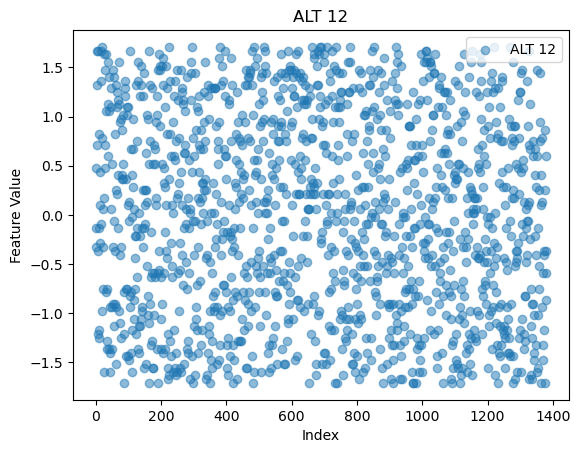

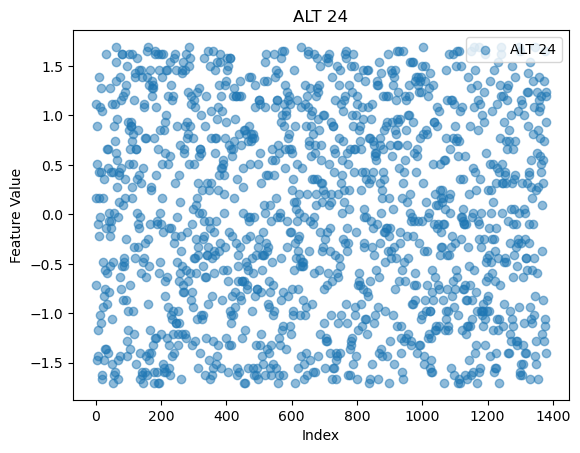

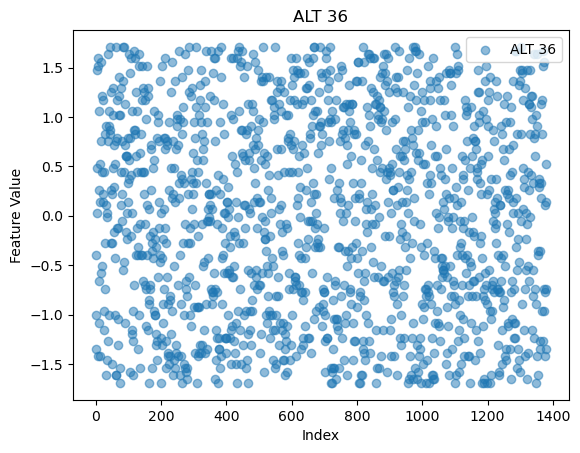

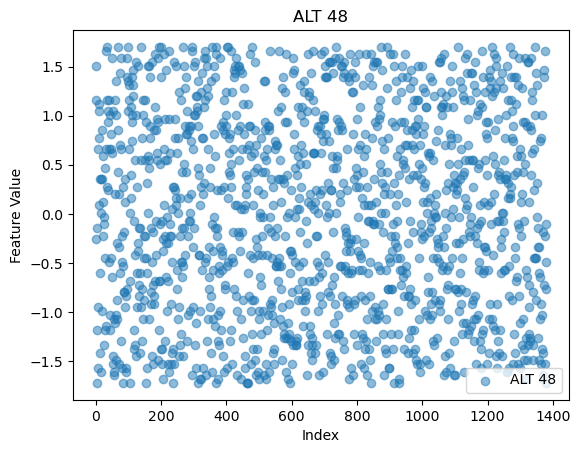

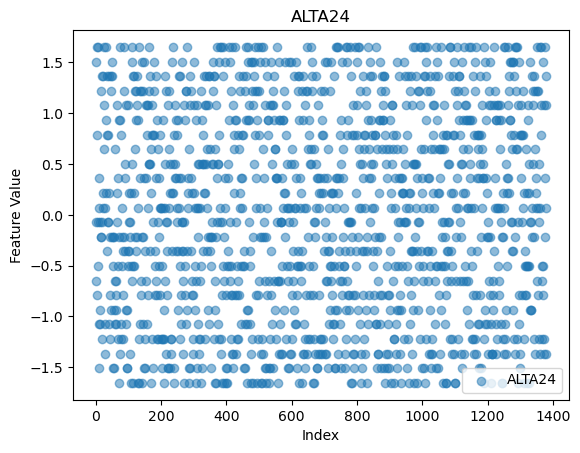

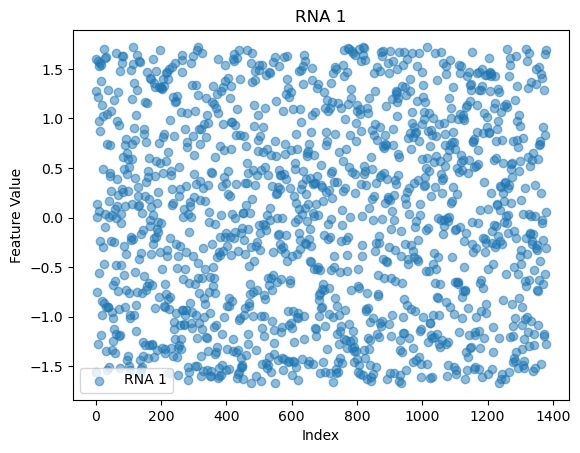

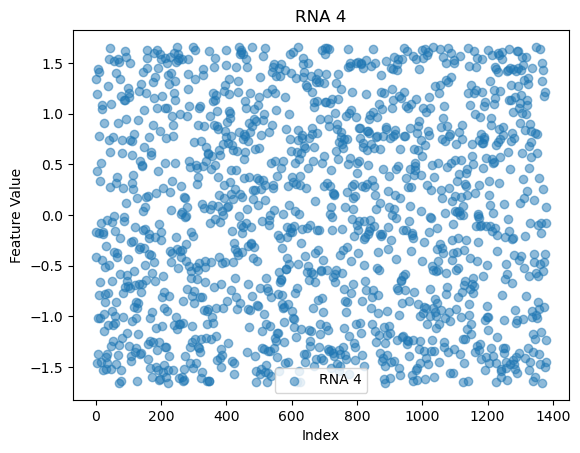

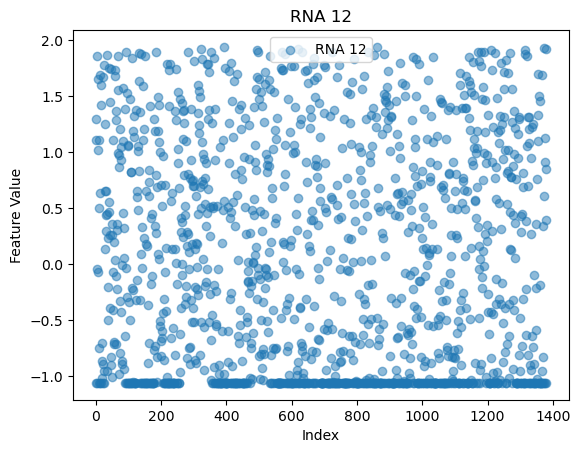

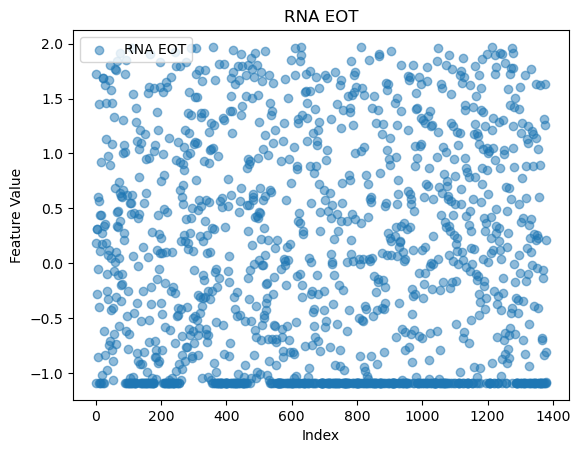

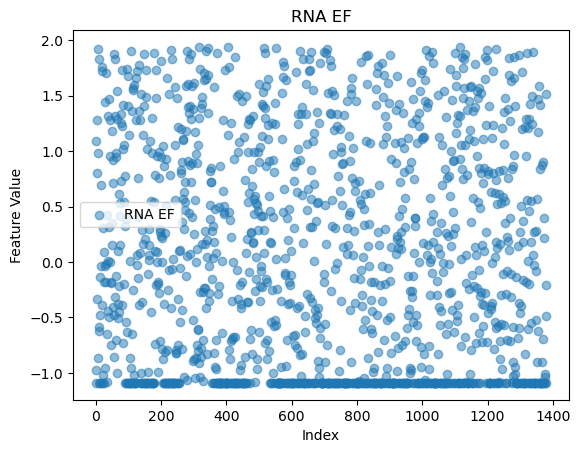

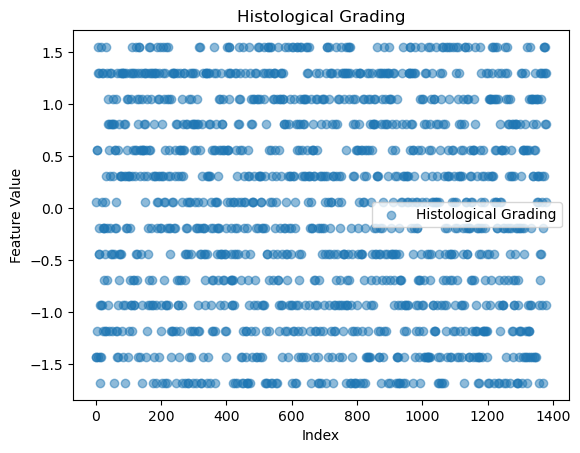

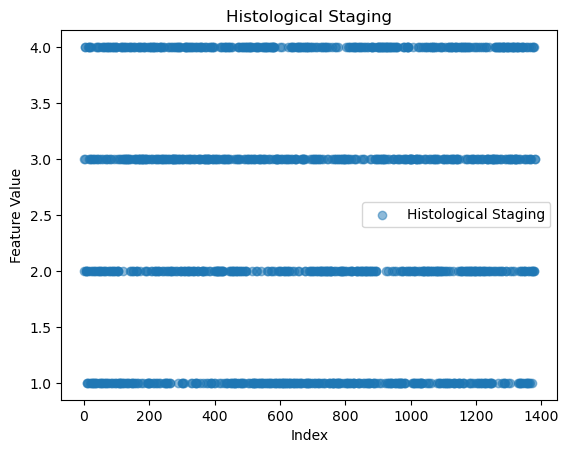

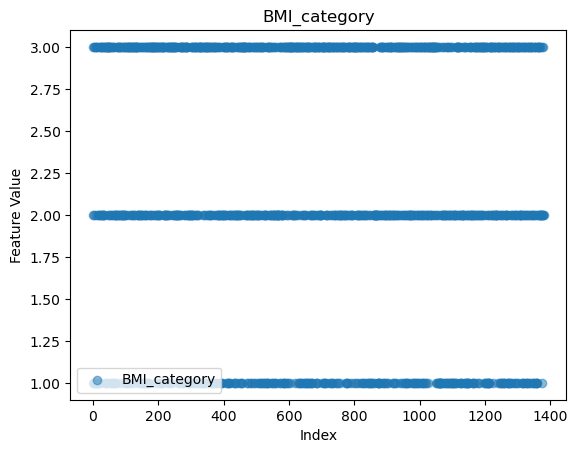

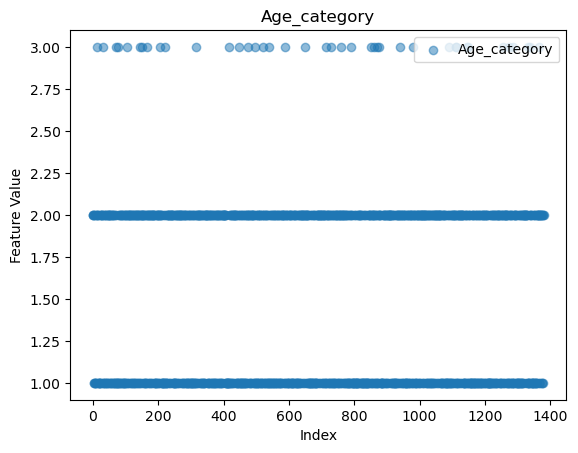

In [49]:
for column in dfcp.columns:
    plt.scatter(range(len(dfcp)), dfcp[column], label=column, alpha=0.5)
    plt.title(column)
    plt.xlabel("Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()

In [13]:
#discretisation
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi <= 24.9:
        return 1  # Normal
    elif 25 <= bmi <= 29.9:
        return 2  # Overweight
    else:
        return 3  # Obese
    
def categorize_age(age):
    if age < 25:
        return 0  # Young Adults
    elif 25 <= age <= 44:
        return 1  # Adults1
    elif 45 <= age <= 60:
        return 2  # Adults2
    else:
        return 3  # Seniors 
dfcp['BMI_category'] = dfcp['BMI'].apply(categorize_bmi)
dfcp['Age_category'] = dfcp['Age'].apply(categorize_age)


In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform the data
dfcp[numerical_columns] = scaler.fit_transform(dfcp[numerical_columns])

In [48]:
dfcp.describe()

Age       Gender           BMI        Fever       Nausea  \
count  1.381000e+03  1381.000000  1.381000e+03  1381.000000  1381.000000   
mean  -4.212577e-17     1.490224 -3.601592e-17     1.515568     1.503259   
std    1.000362e+00     0.500086  1.000362e+00     0.499939     0.500171   
min   -1.631389e+00     1.000000 -1.619604e+00     1.000000     1.000000   
25%   -8.330777e-01     1.000000 -8.828062e-01     1.000000     1.000000   
50%   -3.476663e-02     1.000000  9.959135e-02     2.000000     2.000000   
75%    8.775889e-01     2.000000  8.363895e-01     2.000000     2.000000   
max    1.675900e+00     2.000000  1.573188e+00     2.000000     2.000000   

          Headache     Diarrhea      Fatigue     Jaundice  Epigastric Pain  \
count  1381.000000  1381.000000  1381.000000  1381.000000      1381.000000   
mean      1.495293     1.503259     1.498914     1.501086         1.503983   
std       0.500159     0.500171     0.500180     0.500180         0.500165   
min       1.000000     1.000000     1.000000     1.000000         1.000000   
25%       1.000000     1.000000     1.000000     1.000000         1.000000   
50%       1.000000     2.000000     1.000000     2.000000         2.000000   
75%       2.000000     2.000000     2.000000     2.000000         2.000000   
max       2.000000     2.000000     2.000000     2.000000         2.000000   

       ...        ALTA24         RNA 1         RNA 4        RNA 12  \
count  ...  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03   
mean   ... -2.572566e-18 -3.858849e-17 -2.572566e-17  4.116106e-17   
std    ...  1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00   
min    ... -1.653808e+00 -1.669406e+00 -1.656318e+00 -1.061799e+00   
25%    ... -7.911418e-01 -9.090929e-01 -9.108493e-01 -1.061799e+00   
50%    ...  7.152447e-02  5.427878e-03 -1.406545e-02 -1.937864e-01   
75%    ...  9.341907e-01  8.407523e-01  8.515428e-01  8.820345e-01   
max    ...  1.653079e+00  1.722312e+00  1.658786e+00  1.938406e+00   

            RNA EOT        RNA EF  Histological Grading  Histological Staging  \
count  1.381000e+03  1.381000e+03          1.381000e+03           1381.000000   
mean  -3.858849e-17  7.717698e-17         -3.601592e-17              2.535844   
std    1.000362e+00  1.000362e+00          1.000362e+00              1.120777   
min   -1.088403e+00 -1.089572e+00         -1.680589e+00              1.000000   
25%   -1.088403e+00 -1.089572e+00         -9.346406e-01              2.000000   
50%   -1.374705e-01 -1.764306e-01          5.995672e-02              3.000000   
75%    8.704296e-01  8.825402e-01          8.059047e-01              4.000000   
max    1.969931e+00  1.937861e+00          1.551853e+00              4.000000   

       BMI_category  Age_category  
count   1381.000000   1381.000000  
mean       2.218682      1.582187  
std        0.782951      0.548992  
min        1.000000      1.000000  
25%        2.000000      1.000000  
50%        2.000000      2.000000  
75%        3.000000      2.000000  
max        3.000000      3.000000  

[8 rows x 31 columns]

<Axes: ylabel='count'>

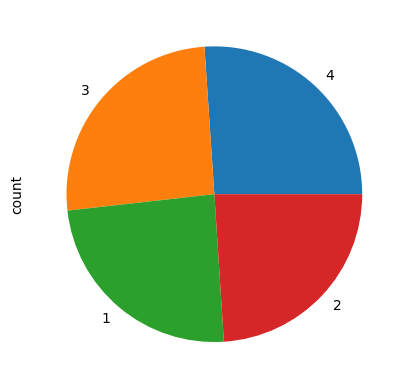

In [15]:
dfcp['Histological Staging'].value_counts().plot.pie()

<Axes: ylabel='count'>

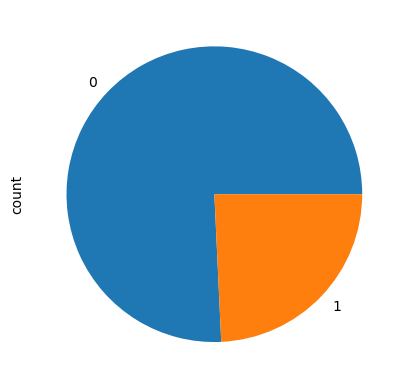

In [16]:
#nova raspodela kategorija hepatitisa C (0- pacijenti sa tezim oboljenjem, 1 - pacijenti sa laksim oboljenjem)
dfcp['Histological Staging'] = dfcp['Histological Staging'].apply(lambda x: 0 if x != 1 else x)
dfcp['Histological Staging'].value_counts().plot.pie()

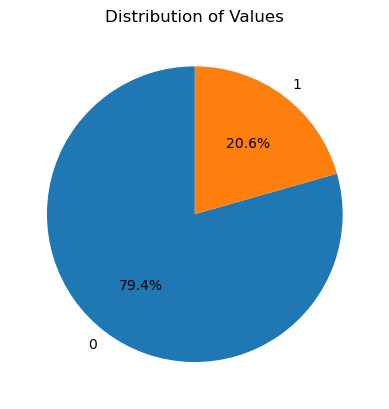

Counter({0: 220, 1: 57})

In [167]:
# Classifiers for data set
#x = dfcp.iloc[:,:-1].values
x = dfcp.copy()
x.drop(['Histological Staging'], axis=1, inplace=True)
y = dfcp['Histological Staging'].values

# Spliting the data set to 80% for training 20% for testing
training_x, testing_x, training_y, testing_y = train_test_split(x,y, test_size=0.20)



# Count occurrences of each unique value
unique_values, counts = np.unique(testing_y, return_counts=True)

# Plotting the pie chart
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Values')
plt.show()
Counter(testing_y)

SMOT

Resampled dataset shape Counter({1: 846, 0: 846})


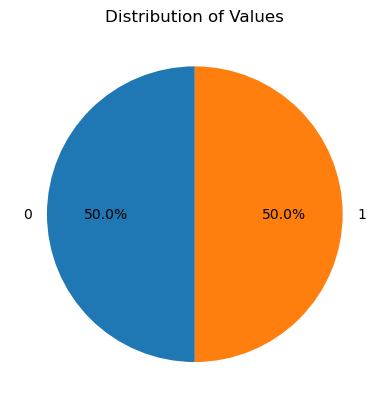

Counter({1: 846, 0: 846})

In [151]:
#Smot oversampling

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(training_x, training_y)
print('Resampled dataset shape %s' % Counter(y_res))


training_x=x_res.copy()
training_y=y_res.copy()


# Count occurrences of each unique value
unique_values, counts = np.unique(y_res, return_counts=True)

# Plotting the pie chart
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Values')
plt.show()
Counter(y_res)

In [168]:
#smoteN

print(f"Original class counts: {Counter(training_y)}")
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
x_res, y_res = sampler.fit_resample(training_x, training_y)
print(f"Class counts after resampling {Counter(y_res)}")

Original class counts: Counter({0: 826, 1: 278})
Class counts after resampling Counter({0: 826, 1: 826})


In [ ]:
#adasyn


from imblearn.over_sampling import ADASYN

print('Original dataset shape %s' % Counter(training_y))
ada = ADASYN(random_state=42)
x_res, y_res = ada.fit_resample(training_x, training_y)
print('Resampled dataset shape %s' % Counter(y_res))

In [79]:
#random oversampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(training_y))
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(training_x, training_y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 835, 1: 269})
Resampled dataset shape Counter({0: 835, 1: 835})


METHODS

Max accuracy: 0.6101083032490975 k = 1


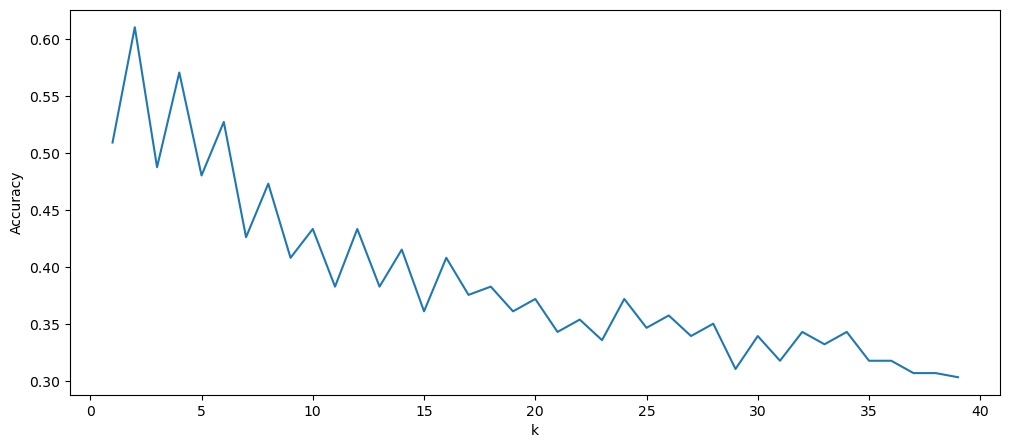

In [19]:
# Checking again with the Accuracy rate
accRate=[]
matrices={}
predicting={}
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(training_x, training_y)
    predicting_i = knn.predict(testing_x)
    accRate.append(metrics.accuracy_score(testing_y, predicting_i))
    matrices.update({i: confusion_matrix(testing_y, predicting_i)})
    #predicting[i] = predicting_i
# Plot the graph to see Accuracy Rate vs k values
plt.figure(figsize=(12,5))
plt.plot(range(1,40), accRate)
plt.xlabel('k')
plt.ylabel('Accuracy')

print("Max accuracy:", max(accRate), "k =", accRate.index(max(accRate)))
#matrices[accRate.index(max(accRate))]

#print(classification_report(testing_y, predicting[accRate.index(max(accRate))]))

In [44]:
logreg = LogisticRegression(multi_class='ovr', max_iter=100)


# Train the model
logreg.fit(training_x, training_y)

# Make predictions on the test set
y_pred = logreg.predict(testing_x)


# Evaluate the model
accuracy = accuracy_score(testing_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(testing_y, y_pred))


# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(logreg, training_x, training_y, cv=kfold, scoring='accuracy')

# Display the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:")
print(cv_scores)

# Display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")

Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       220
           1       0.15      0.23      0.18        57

    accuracy                           0.58       277
   macro avg       0.46      0.45      0.45       277
weighted avg       0.65      0.58      0.61       277

Cross-validated Accuracy Scores:
[0.69277108 0.68674699 0.72121212 0.66060606 0.67878788 0.7030303
 0.59393939 0.65454545 0.70909091 0.63030303]

Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.04


In [86]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(training_x, training_y)

# Make predictions on the testing data
y_pred = rf_classifier.predict(testing_x)

# Evaluate the performance of the model
accuracy = accuracy_score(testing_y, y_pred)
conf_matrix = confusion_matrix(testing_y, y_pred)
classification_rep = classification_report(testing_y, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)




# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, training_x, training_y, cv=kfold, scoring='accuracy')

# Display the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:")
print(cv_scores)

# Display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")



Accuracy: 0.66

Confusion Matrix:
[[179  14]
 [ 80   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       193
           1       0.22      0.05      0.08        84

    accuracy                           0.66       277
   macro avg       0.46      0.49      0.44       277
weighted avg       0.55      0.66      0.58       277

Cross-validated Accuracy Scores:
[0.87134503 0.88888889 0.88888889 0.84210526 0.87719298 0.85380117
 0.88823529 0.80588235 0.89411765 0.83529412]

Mean Accuracy: 0.86
Standard Deviation of Accuracy: 0.03


In [169]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=3)

# Fit the model to the training data
xgb_classifier.fit(training_x, training_y)

# Make predictions on the test set
y_pred = xgb_classifier.predict(testing_x)

# Evaluate the model
accuracy = accuracy_score(testing_y, y_pred)
conf_matrix = confusion_matrix(testing_y, y_pred)
classification_rep = classification_report(testing_y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(xgb_classifier, training_x, training_y, cv=kfold, scoring='accuracy')

# Display the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:")
print(cv_scores)

# Display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")



Accuracy: 0.76

Confusion Matrix:
[[202  18]
 [ 49   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       220
           1       0.31      0.14      0.19        57

    accuracy                           0.76       277
   macro avg       0.56      0.53      0.53       277
weighted avg       0.70      0.76      0.72       277

Cross-validated Accuracy Scores:
[0.67567568 0.72072072 0.66666667 0.81081081 0.65454545 0.69090909
 0.69090909 0.69090909 0.61818182 0.64545455]

Mean Accuracy: 0.69
Standard Deviation of Accuracy: 0.05


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)




# Fit the model to the training data
ada_classifier.fit(training_x, training_y)

# Make predictions on the test set
y_pred = ada_classifier.predict(testing_x)

# Evaluate accuracy
accuracy = accuracy_score(testing_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(testing_y, y_pred)
print(conf_matrix)

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(ada_classifier, training_x, training_y, cv=kfold, scoring='accuracy')

# Display the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:")
print(cv_scores)

# Display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")

Accuracy: 0.61
[[153  67]
 [ 42  15]]
Cross-validated Accuracy Scores:
[0.6626506  0.75301205 0.73333333 0.7030303  0.7030303  0.73939394
 0.63030303 0.6969697  0.79393939 0.7030303 ]

Mean Accuracy: 0.71
Standard Deviation of Accuracy: 0.04


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(training_x, training_y)

# Make predictions on the test set
y_pred = svm_classifier.predict(testing_x)

# Evaluate the model
accuracy = accuracy_score(testing_y, y_pred)
conf_matrix = confusion_matrix(testing_y, y_pred)
classification_rep = classification_report(testing_y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(svm_classifier, training_x, training_y, cv=kfold, scoring='accuracy')

# Display the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:")
print(cv_scores)

# Display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")

Accuracy: 0.60

Confusion Matrix:
[[155  65]
 [ 46  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       220
           1       0.14      0.19      0.17        57

    accuracy                           0.60       277
   macro avg       0.46      0.45      0.45       277
weighted avg       0.64      0.60      0.62       277

Cross-validated Accuracy Scores:
[0.71686747 0.68072289 0.72121212 0.66060606 0.69090909 0.67272727
 0.58181818 0.64242424 0.72121212 0.63636364]

Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.04


HYPER PARAMETERS

In [60]:
from scipy.stats import uniform, randint
# Define the hyperparameter grid
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Instantiate the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')



# Randomized Search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # Set a random seed for reproducibility
)

random_search.fit(training_x, training_y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'colsample_bytree': 0.6923575302488596, 'learning_rate': 0.034102546602601175, 'max_depth': 6, 'n_estimators': 554, 'subsample': 0.8439986631130484}


In [170]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.05,0.1],
    'max_depth': [6,7,8],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [1.0],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data with grid search
grid_search.fit(training_x, training_y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_classifier = xgb_classifier.set_params(**best_params)
best_xgb_classifier.fit(training_x, training_y)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(testing_x)

# Evaluate the model
accuracy = accuracy_score(testing_y, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")



Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}
Accuracy on Test Set: 0.79


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}

In [171]:
accuracy_best = accuracy_score(testing_y, y_pred)
conf_matrix_best = confusion_matrix(testing_y, y_pred)
classification_rep_best = classification_report(testing_y, y_pred)

print('\nConfusion Matrix (Tuned):')
print(conf_matrix_best)
print('\nClassification Report (Tuned):')
print(classification_rep_best)


Confusion Matrix (Tuned):
[[214   6]
 [ 53   4]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       220
           1       0.40      0.07      0.12        57

    accuracy                           0.79       277
   macro avg       0.60      0.52      0.50       277
weighted avg       0.72      0.79      0.72       277



In [60]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(training_x, training_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(training_x, training_y)

# Make predictions on the testing data
y_pred_best = best_rf_classifier.predict(testing_x)

# Evaluate the performance of the tuned model
accuracy_best = accuracy_score(testing_y, y_pred_best)
conf_matrix_best = confusion_matrix(testing_y, y_pred_best)
classification_rep_best = classification_report(testing_y, y_pred_best)

# Print the results
print('Best Parameters:', best_params)
print(f'Accuracy (Tuned): {accuracy_best:.2f}')
print('\nConfusion Matrix (Tuned):')
print(conf_matrix_best)
print('\nClassification Report (Tuned):')
print(classification_rep_best)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy (Tuned): 0.69

Confusion Matrix (Tuned):
[[186  13]
 [ 72   6]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       199
           1       0.32      0.08      0.12        78

    accuracy                           0.69       277
   macro avg       0.52      0.51      0.47       277
weighted avg       0.61      0.69      0.62       277



REDUCTION OF DIMENSIONALITY

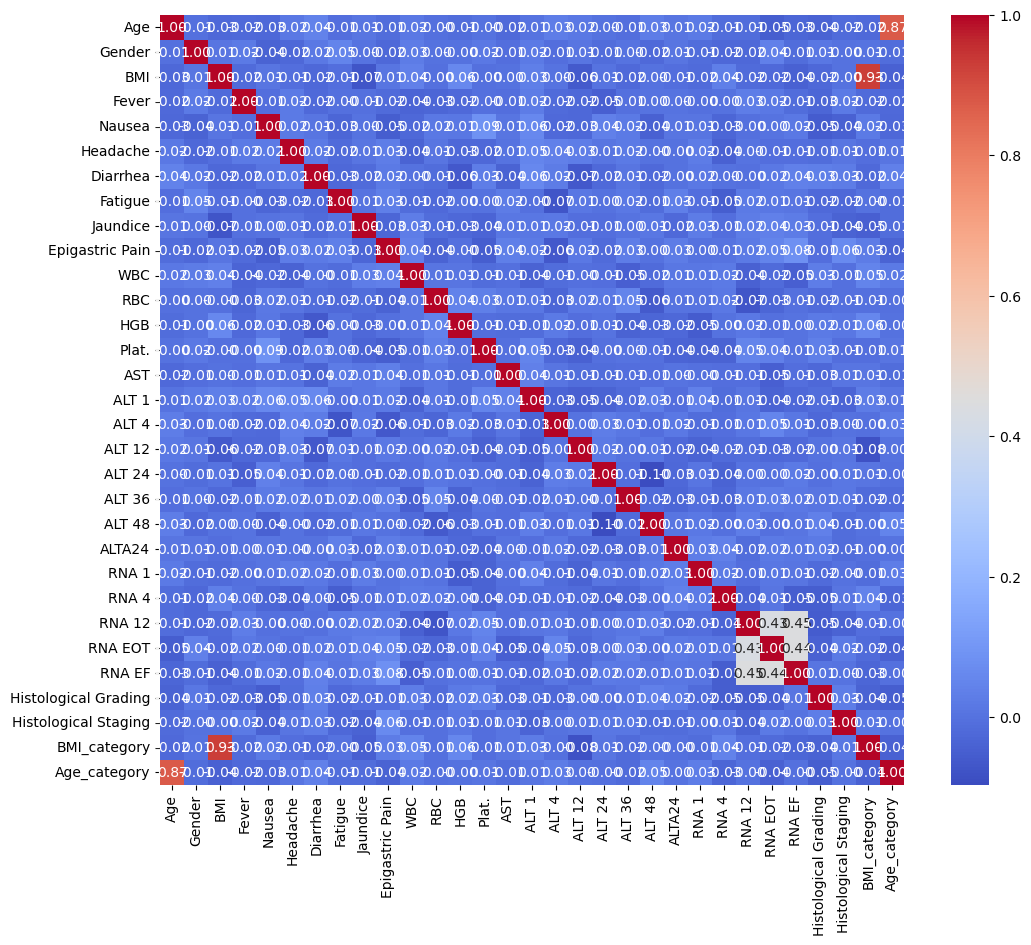

In [54]:
#correlation_matrix = x.corr()
correlation_matrix = dfcp.corr()

# You can also create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

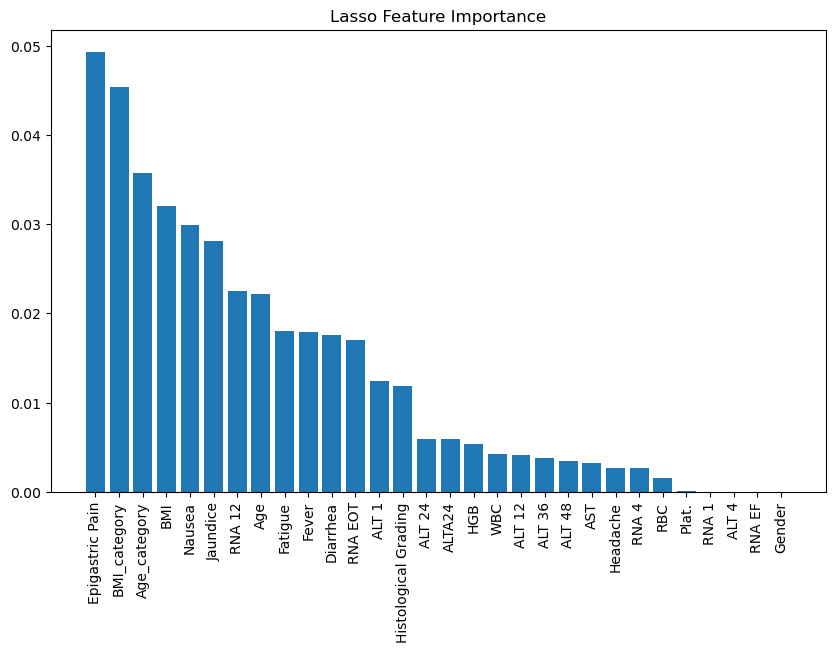

In [99]:
#lasso
from sklearn.linear_model import Lasso


# Assuming 'X' is your feature matrix and 'y' is your target variable
model = Lasso(alpha=0.001)  # You can adjust the regularization strength (alpha) based on your needs
model.fit(x, y)

# Get the feature importances (coefficients)
feature_importance = model.coef_

# Sort feature importances in descending order
indices = np.argsort(np.abs(feature_importance))[::-1]
names = [x.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Lasso Feature Importance")
plt.bar(range(x.shape[1]), np.abs(feature_importance)[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show()

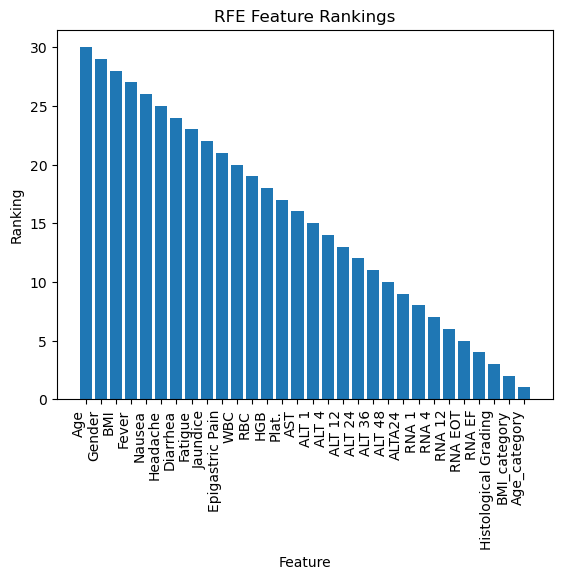

In [136]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet

rfe = RFE(estimator=ElasticNet(alpha=1.0, l1_ratio=0.5), n_features_to_select=1)
rfe.fit(training_x, training_y)

# Plot feature rankings
plt.bar(range(len(rfe.ranking_)), rfe.ranking_, tick_label=training_x.columns)
plt.xticks(rotation=90, ha="right")
plt.title('RFE Feature Rankings')
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.show()

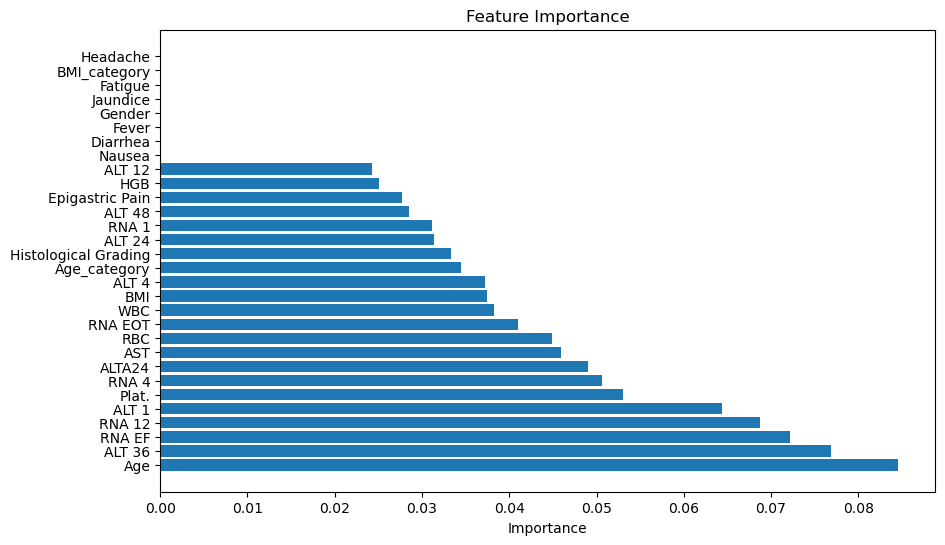

In [174]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Create an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model to the training data
xg_reg.fit(training_x, training_y)

# Make predictions on the test set
y_pred = xg_reg.predict(testing_x)

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(testing_y, y_pred)
#print(f'Mean Squared Error: {mse}')

# Access feature importance scores
feature_importance = xg_reg.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [179]:
#drop
coulmns_Drop = ['Gender','Headache','BMI_category','Fatigue','Diarrhea','Nausea']

training_xC = training_x.copy()
testing_xC = testing_x.copy()
training_xC.drop(columns=coulmns_Drop, inplace=True)
testing_xC.drop(columns=coulmns_Drop, inplace=True)
training_xC

Age       BMI  Fever  Jaundice  Epigastric Pain       WBC  \
524   0.193322 -1.619604      2         2                1 -0.251093   
1099 -1.061167 -0.146008      1         2                1 -0.891007   
852   1.447811 -0.146008      1         1                2  1.200429   
735  -1.403300 -1.619604      2         2                2  1.653654   
190   0.763544  1.327588      2         2                2  1.208301   
...        ...       ...    ...       ...              ...       ...   
1082  1.105678 -0.882806      1         2                1  1.122829   
672   0.421411 -1.128406      1         1                1 -0.776669   
1383  0.649500  0.099591      2         2                1 -0.105641   
1145  0.991633  0.099591      1         2                2  1.321888   
974  -1.061167 -0.882806      2         2                2 -0.409291   

           RBC       HGB     Plat.       AST  ...    ALT 36    ALT 48  \
524  -0.733662 -0.344528  1.302042  0.124786  ...  0.524212  0.931136   
1099 -0.076720 -0.928324 -0.568470  1.587485  ...  0.906277  1.085016   
852  -1.717339  1.406858  0.226628 -0.991485  ...  1.593995 -0.069084   
735  -0.325320 -0.344528 -0.532880  0.163278  ... -1.042255 -1.492475   
190   0.492881  0.239267 -1.173324 -1.145453  ... -1.462527  0.546436   
...        ...       ...       ...       ...  ...       ...       ...   
1082 -0.498560  0.823063 -1.056760 -1.183945  ... -1.118668 -0.723075   
672   1.612709  1.406858  0.733397  1.087088  ... -1.042255  0.623376   
1383 -0.520399 -1.512119  1.225708 -0.491088  ... -1.347907 -0.107554   
1145 -0.417288  1.406858 -1.631668  1.087088  ... -1.424320 -1.223185   
974  -1.075686  1.406858 -1.164743 -0.144659  ...  1.708614 -0.184495   

        ALTA24     RNA 1     RNA 4    RNA 12   RNA EOT    RNA EF  \
524  -0.647364  0.510514 -1.545572 -0.216798  0.075095 -0.729935   
1099  0.790413  0.304183 -0.084232 -1.047547  0.021192  0.447084   
852   0.502858 -1.584164  1.640722 -1.061799 -1.088403 -1.089572   
735   1.365524 -0.391966 -1.394091  1.377491 -0.102376  1.189327   
190   0.934191 -0.112518  1.625964  0.683645 -0.139555 -0.003941   
...        ...       ...       ...       ...       ...       ...   
1082 -0.072253 -0.038560 -1.352196  1.373628  0.610909 -0.563083   
672  -1.653808  0.014075 -1.487061  1.836469  0.819140  0.012775   
1383  1.365524 -1.274452 -1.446230  0.848370 -1.079115  1.510983   
1145 -0.647364  0.446550  1.202962 -1.061799 -1.088403 -1.089572   
974   1.653079 -1.321462 -0.228308  1.847844  1.806998 -0.126801   

      Histological Grading  Age_category  
524               0.308606             2  
1099              1.551853             1  
852               0.805905             2  
735              -0.437342             1  
190              -0.188693             2  
...                    ...           ...  
1082              0.308606             2  
672              -1.431939             2  
1383              1.303203             2  
1145              1.054554             2  
974               0.557255             1  

[1104 rows x 24 columns]

final

{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [180]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [150],
    'learning_rate': [0.05],
    'max_depth': [8],
    'subsample': [0.9],
    'colsample_bytree': [1.0],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data with grid search
grid_search.fit(training_xC, training_y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_classifier = xgb_classifier.set_params(**best_params)
best_xgb_classifier.fit(training_xC, training_y)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(testing_xC)

# Evaluate the model
accuracy = accuracy_score(testing_y, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")


conf_matrix_best = confusion_matrix(testing_y, y_pred)
classification_rep_best = classification_report(testing_y, y_pred)

print('\nConfusion Matrix (Tuned):')
print(conf_matrix_best)
print('\nClassification Report (Tuned):')
print(classification_rep_best)

Accuracy on Test Set: 0.79

Confusion Matrix (Tuned):
[[216   4]
 [ 53   4]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       220
           1       0.50      0.07      0.12        57

    accuracy                           0.79       277
   macro avg       0.65      0.53      0.50       277
weighted avg       0.74      0.79      0.73       277

